# Семинар 7. Логистическая регрессия и SVM

### Логистическая регрессия

В случае бинарной классификации простейший линейный классификатор ввыглядит так:

$$
f(x_i, w) = \mathrm{sign}\left(\langle x_i, w \rangle\right).
$$

Функция потерь для такой задачи – это сумма индикаторов того, что предсказание сделано неверно: 

$$Q(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \ne \mathrm{sign}\left(\langle x_i, w \rangle\right)].$$

Гораздо удобнее переписать эту функцию потерь через отступ:

$$
Q(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \langle x_i, w \rangle < 0].
$$

Понятно, что такую функцию проблематично дифференцировать по $w$. Вместо этого будем минимизировать некоторую функцию $Q'(X, w)$, являющуюся верхней оценкой для $Q(X, w)$, и надеяться, что минимизация $Q'(X, w)$ позволит достаточно хорошо минимизировать и $Q(X, w)$.

Логистическая регрессия предлагает использовать логистическую функцию потерь:

$$
Q'(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}\log(1 + e^{-y_i \langle x_i, w \rangle}) \rightarrow \min_w.
$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

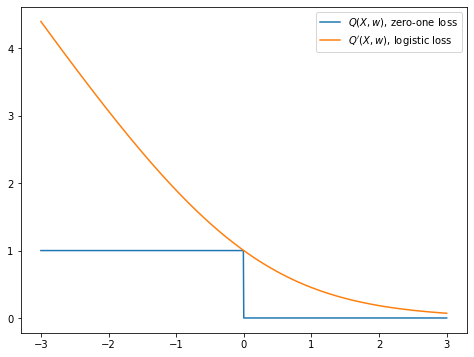

In [3]:
x = np.concatenate((np.linspace(-3, 0, 500), np.linspace(0, 3, 500)))
np.random.seed(123)
y = np.ones(1000)
w = np.ones(1000)
M = y * x * w

plt.figure(figsize = (8, 6))
_ = plt.plot(x * w, x < 0, label = '$Q(X, w)$, zero-one loss')
_ = plt.plot(M, np.log2(1 + np.exp(-M)), label = "$Q'(X, w)$, logistic loss")
_ = plt.legend()

Можно показать, что задачу логистичсекий регрессии можно перерписать в следующем виде:

$$
Q'(X, w) = -\frac{1}{\ell} \sum_{i=1}^{\ell} [y_i = 1]\log\sigma(\langle x_i, w \rangle) + [y_i = -1](1 - \log(\sigma(\langle x_i, w \rangle))
$$

Эта функция называется log-loss или кросс-энтропией между истинной целевой переменной и предсказанными вероятностями.

Регуляризация вводится таким же образом, как это было в случае линейной регрессии. Например, функция потерь для $L$-$2$ регуляризации выглядит так:

$$
\bar{Q}'(X, w) = Q'(X, w) + \frac{1}{2}\lambda\|w\|^2_2.
$$

### Метод опорных векторов (SVM)

Суть SVM сводится к максимизации ширины разделяющей полосы между классами.

Ниже описана идея, а подробный вывод при желании можно прочитать, например, в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture05-linclass.pdf) ФКН.


Мы по-прежнему решаем задачу бинарной классификации и используем классификатор $f(x_i, w) = \mathrm{sign}(\langle x_i, w\rangle)$. Этот классификатор задает какую-то гиперплоскость, которая делит наше пространство на две части.  Предположим, что мы работаем с линейно разделимой выборкой. Мы хотим максимизировать расстояние от гиперплоскости до ближайшего к этой гиперплоскости объекта обучающей выборки:

$$
\rho(x_i, \langle x, w\rangle) =  \min_i\dfrac{|{\langle x_i, w\rangle|}}{\|w\|}.
$$

Воспользуемся картинкой из Википедии, чтобы лучше понять эту идею:

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1920px-SVM_margin.png" alt="drawing" width="400"/>](https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png)

Заметим, что при делении $f(\cdot)$ на положительное число ответы классификатора не меняются. Поделим $w$ нашего классификатора на $\min_i |\langle x_i, w \rangle|$. Тогда отступ можно переписать как
$$
\rho(\langle x_i, w\rangle) = \frac{1}{\|w\|}.
$$

Задача SVM в линейно-разделимом случае выглядит так:
$$
\begin{cases}
\|w\|^2 \to \min_{w}, \\
y_i(\langle x_i, w\rangle) \ge 1, \\
\end{cases}
$$

Если выборка не является линейно-разделимой, то нам придётся позволить линейному классификатору допускать ошибки на некоторых наблюдениях. Для этого в задачу вводят штраф $\xi_i \ge 0$ за неидеальную классификацию. Тогда в ходе решения задачи мы хотим с одной стороны максимизировать ширину разделяющий полосы, а с другой стороны — минимизировать штраф за неидеальное разделение выборки:

$$
\begin{cases}
\|w\|^2 + C \sum_{i = 1}^{\ell} \xi_i \to \min_{w, \xi_i}, \\
y_i(\langle x_i, w\rangle) \ge 1 - \xi_i, \\
\xi_i \ge 0
\end{cases}
$$

$C$ – параметр, который позволяет регулировать пропорции этого выбора. Чем больше $C$, тем больше штраф за неверную классификацию на обучающей выборке.

[<img src="https://miro.medium.com/max/1400/1*0vOVPBmYCkw-sUt77HtyGA.png" alt="drawing" width="800"/>](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)

Путём хитрых математических преобразований можно показать, что итоговая функция потерь SVM выглядит следующим образом:

$$
Q(X, w) = C\sum_{i=1}^{l} \max\{0, 1 - y_i(\langle x_i, w\rangle)\} + \|w\|^2 \to \min_w
$$

### Практика

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка. 

[<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" alt="drawing" width="800"/>](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Задание 1.** Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку 0. 

In [8]:
y[y!=1] = 0

**Задание 2**. Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Построим диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [12]:
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
preprocessor = ColumnTransformer([
                 ('scale', StandardScaler(),
                 make_column_selector(dtype_include=np.number))])

In [14]:
X_train_scaled = preprocessor.fit_transform(X_train)

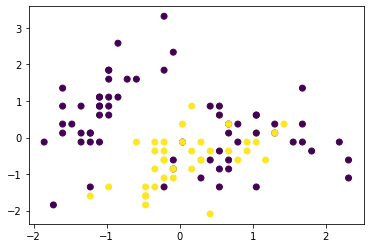

In [15]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.show()

**Задание 3.** Сравним качество для SVM и логрега. Есть небольшой дисбаланс классов, поэтому будем смотреть на f1-меру.

In [24]:
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear'))])
pipe_log_reg = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression())])

In [25]:
pipe_svm.fit(X_train, y_train)
pipe_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcb78c7e040>)])),
                ('clf', LogisticRegression())])

In [26]:
prediciton_svm = pipe_svm.predict(X_test)
prediciton_log_reg = pipe_log_reg.predict(X_test)

In [27]:
from sklearn.metrics import f1_score
print(f'LR: {f1_score(y_test, prediciton_log_reg)}')
print(f'SVM: {f1_score(y_test, prediciton_svm)}')

LR: 0.6956521739130435
SVM: 0.8000000000000002


Text(0.5, 1.0, 'Разделяющая поверхность для SVM')

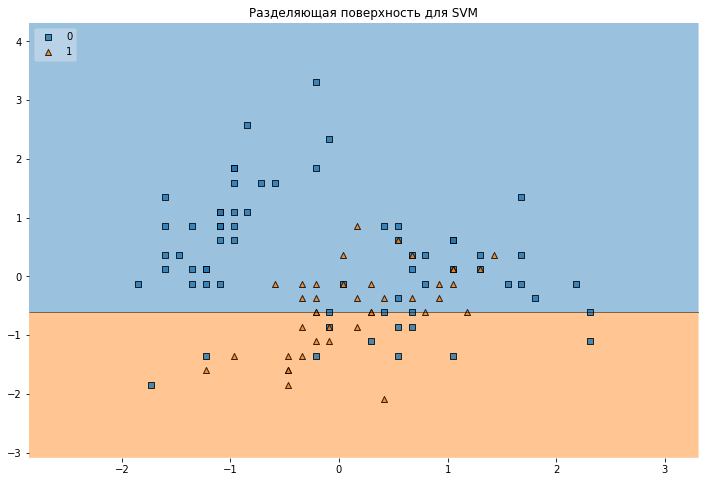

In [28]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,8))
plot_decision_regions(X_train_scaled, y_train, clf=pipe_svm.named_steps['clf'], legend=2)
plt.title('Разделяющая поверхность для SVM')

Text(0.5, 1.0, 'Разделяющая поверхность для логрега')

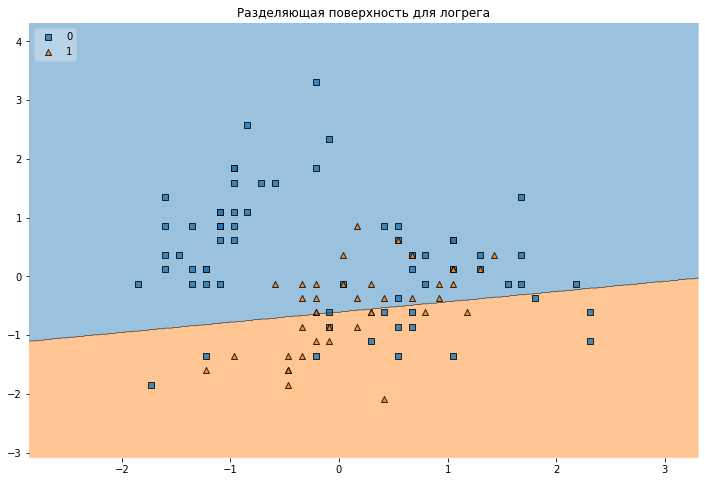

In [29]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train_scaled, y_train, clf=pipe_log_reg.named_steps['clf'], legend=2)
plt.title('Разделяющая поверхность для логрега')

Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

**Задание 3.** Обучите три различные логистические регрессии с разным параметром регуляризации $C$.

In [30]:
pipe_log_reg_1 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression(C=0.01))])
pipe_log_reg_2 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression(C=0.05))])
pipe_log_reg_3 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', LogisticRegression(C=10))])

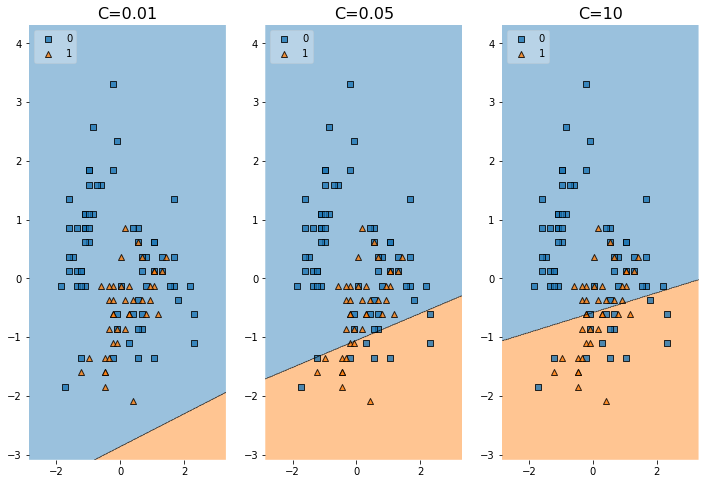

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [pipe_log_reg_1, pipe_log_reg_2, pipe_log_reg_3]


for ind, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    fig = plot_decision_regions(X_train_scaled, y_train, clf=pipe.named_steps['clf'], legend=2, ax=axes[ind])
    fig.set_title(f"C={pipe.get_params()['clf__C']}", fontsize=16)


Перейдём к SVM.

**Задание 4.** Обучите три SVM с линейным ядром с разным параметром регуляризации $C$. Как изменяется разделяющая поверхность в зависимости от $C$?

In [155]:
pipe_svm_1 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear', C=0.04))])
pipe_svm_2 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear', C=0.4))])
pipe_svm_3 = Pipeline(steps=[('preprocessor', preprocessor), ('clf', SVC(kernel='linear', C=1))])

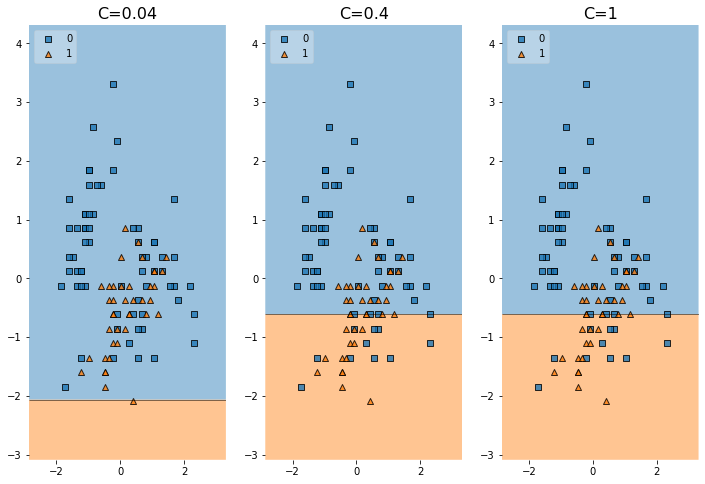

In [156]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 8))
pipes = [pipe_svm_1, pipe_svm_2, pipe_svm_3]


for ind, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    fig = plot_decision_regions(X_train_scaled, y_train, clf=pipe.named_steps['clf'], legend=2, ax=axes[ind])
    fig.set_title(f"C={pipe.get_params()['clf__C']}", fontsize=16)